In [2]:
from unstructured.partition.pdf import partition_pdf
from unstructured.documents.elements import Element, Text, Image, FigureCaption

d:\Saurabh Pandey\localRag\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
base_dir = "files"
pdf_file_name = "RAG Paper.pdf"

pdf_file_path = f"{base_dir}/{pdf_file_name}"



In [4]:
raw_chunks = partition_pdf(
    filename=pdf_file_path,
    strategy="hi_res",
    infer_table_structure = True,
    extract_image_block_types = ["Image","Figure","Table"],
    extract_image_block_to_payload= True,
    chunking_strategy = None,
)

Loading weights: 100%|██████████| 367/367 [00:00<00:00, 647.40it/s, Materializing param=model.query_position_embeddings.weight]                             


In [5]:
raw_chunks

In [6]:
for idx, chunk in enumerate(raw_chunks):
    if isinstance(chunk, Image):
        print(idx)
        

26
39
53
241
305
416


### Image Parsing

In [7]:
raw_chunks[26].to_dict()

{'type': 'Image',
 'element_id': 'b96e8e2a1af0d706a396a5740514e346',
 'text': 'Fine-tuning 2024 InstructRetro 2023 Retrieval—Augmented Generation Pre-training Inference RADA, G-Retriever RAPTOR SN gy T IRCOT Retro++ Augmentation Stage',
 'metadata': {'coordinates': {'points': ((np.float64(243.10555555555555),
     np.float64(155.7240000000001)),
    (np.float64(243.10555555555555), np.float64(1028.3555555555556)),
    (np.float64(1456.865), np.float64(1028.3555555555556)),
    (np.float64(1456.865), np.float64(155.7240000000001))),
   'system': 'PixelSpace',
   'layout_width': 1700,
   'layout_height': 2200},
  'last_modified': '2026-02-02T15:45:18',
  'filetype': 'application/pdf',
  'languages': ['eng'],
  'page_number': 2,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANoBL4DASIAAhEBAxEB/8QAHwAAA

In [8]:
raw_chunks[27].to_dict()

{'type': 'FigureCaption',
 'element_id': 'c63b840c62efdf7567c303d99633a291',
 'text': 'Fig. 1. Technology tree of RAG research. The stages of involving RAG mainly include pre-training, fine-tuning, and inference. With the emergence of LLMs, research on RAG initially focused on leveraging the powerful in context learning abilities of LLMs, primarily concentrating on the inference stage. Subsequent research has delved deeper, gradually integrating more with the fine-tuning of LLMs. Researchers have also been exploring ways to enhance language models in the pre-training stage through retrieval-augmented techniques.',
 'metadata': {'detection_class_prob': 0.8933813571929932,
  'is_extracted': 'true',
  'coordinates': {'points': ((np.float64(130.4752655029297),
     np.float64(1060.8123377777779)),
    (np.float64(130.4752655029297), np.float64(1157.670948888889)),
    (np.float64(1576.178955078125), np.float64(1157.670948888889)),
    (np.float64(1576.178955078125), np.float64(1060.8123377

In [9]:
# Extract images and their captions from the raw chunks
all_images = []

for idx, chunk in enumerate(raw_chunks):
    if isinstance(chunk, Image):
        # check idx + 1 is figure caption
        if idx + 1 < len(raw_chunks) and isinstance(raw_chunks[idx + 1], FigureCaption):
            caption = raw_chunks[idx + 1].text
        else:
            caption = None

        all_images.append({
            "index": idx,
            "caption": caption if caption else "No caption",
            "image_text": chunk.text,
            "base64_image": chunk.metadata.image_base64,
        })

In [10]:
all_images[0]

{'index': 26,
 'caption': 'Fig. 1. Technology tree of RAG research. The stages of involving RAG mainly include pre-training, fine-tuning, and inference. With the emergence of LLMs, research on RAG initially focused on leveraging the powerful in context learning abilities of LLMs, primarily concentrating on the inference stage. Subsequent research has delved deeper, gradually integrating more with the fine-tuning of LLMs. Researchers have also been exploring ways to enhance language models in the pre-training stage through retrieval-augmented techniques.',
 'image_text': 'Fine-tuning 2024 InstructRetro 2023 Retrieval—Augmented Generation Pre-training Inference RADA, G-Retriever RAPTOR SN gy T IRCOT Retro++ Augmentation Stage',
 'base64_image': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCANoBL4DASIAAhEBAxEB/8QAHwAAAQ

In [11]:
import base64
from IPython.display import display, Image as IPImage
def display_image(image_base64):
    image_data = base64.b64decode(image_base64)
    display(IPImage(data=image_data,format = 'png'))

Index: 26,Caption:Fig. 1. Technology tree of RAG research. The stages of involving RAG mainly include pre-training, fine-tuning, and inference. With the emergence of LLMs, research on RAG initially focused on leveraging the powerful in context learning abilities of LLMs, primarily concentrating on the inference stage. Subsequent research has delved deeper, gradually integrating more with the fine-tuning of LLMs. Researchers have also been exploring ways to enhance language models in the pre-training stage through retrieval-augmented techniques.


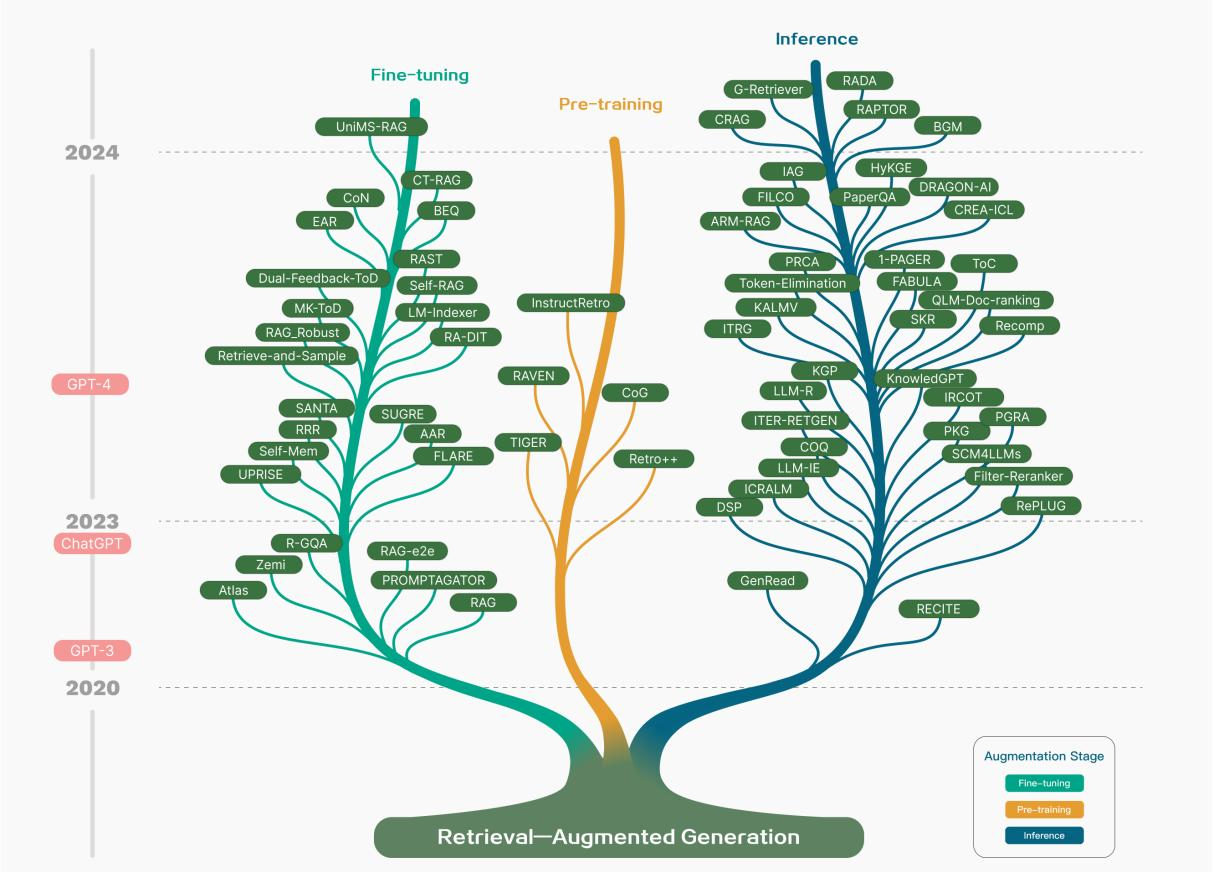

Index: 39,Caption:Fig. 2. A representative instance of the RAG process applied to question answering. It mainly consists of 3 steps. 1) Indexing. Documents are split into chunks, encoded into vectors, and stored in a vector database. 2) Retrieval. Retrieve the Top k chunks most relevant to the question based on semantic similarity. 3) Generation. Input the original question and the retrieved chunks together into LLM to generate the final answer.


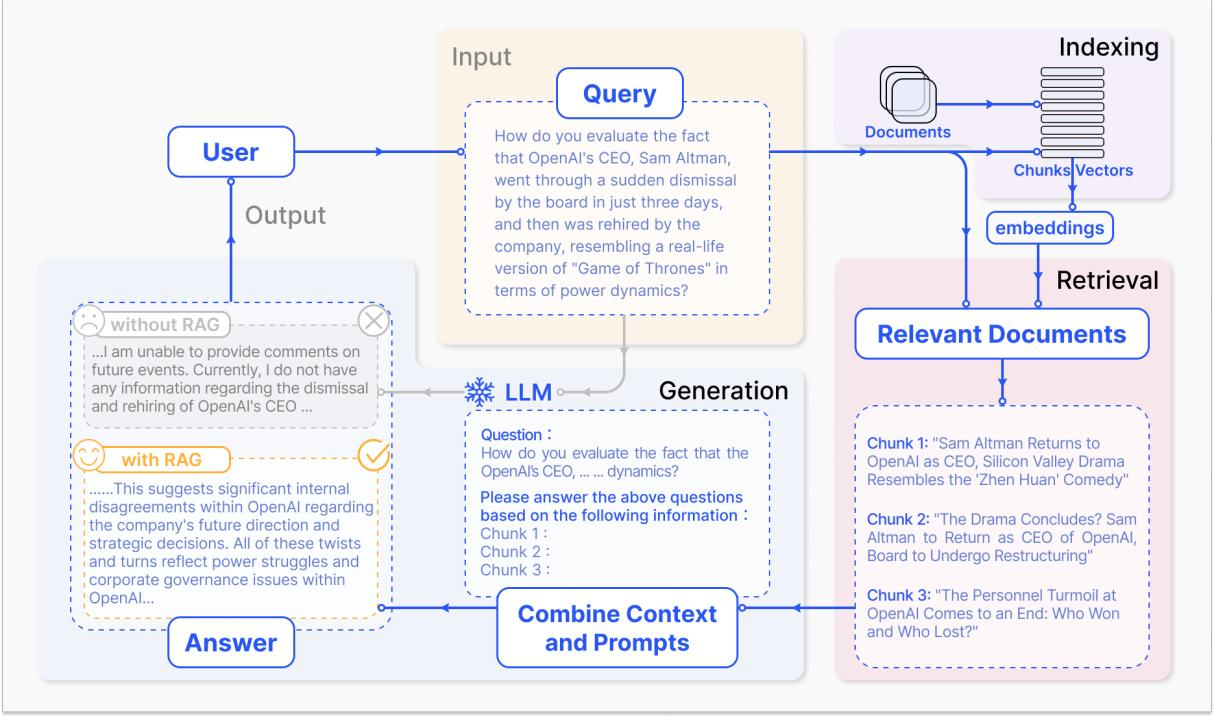

Index: 53,Caption:Fig. 3. Comparison between the three paradigms of RAG. (Left) Naive RAG mainly consists of three parts: indexing, retrieval and generation. (Middle) Advanced RAG proposes multiple optimization strategies around pre-retrieval and post-retrieval, with a process similar to the Naive RAG, still following a chain-like structure. (Right) Modular RAG inherits and develops from the previous paradigm, showcasing greater flexibility overall. This is evident in the introduction of multiple specific functional modules and the replacement of existing modules. The overall process is not limited to sequential retrieval and generation; it includes methods such as iterative and adaptive retrieval.


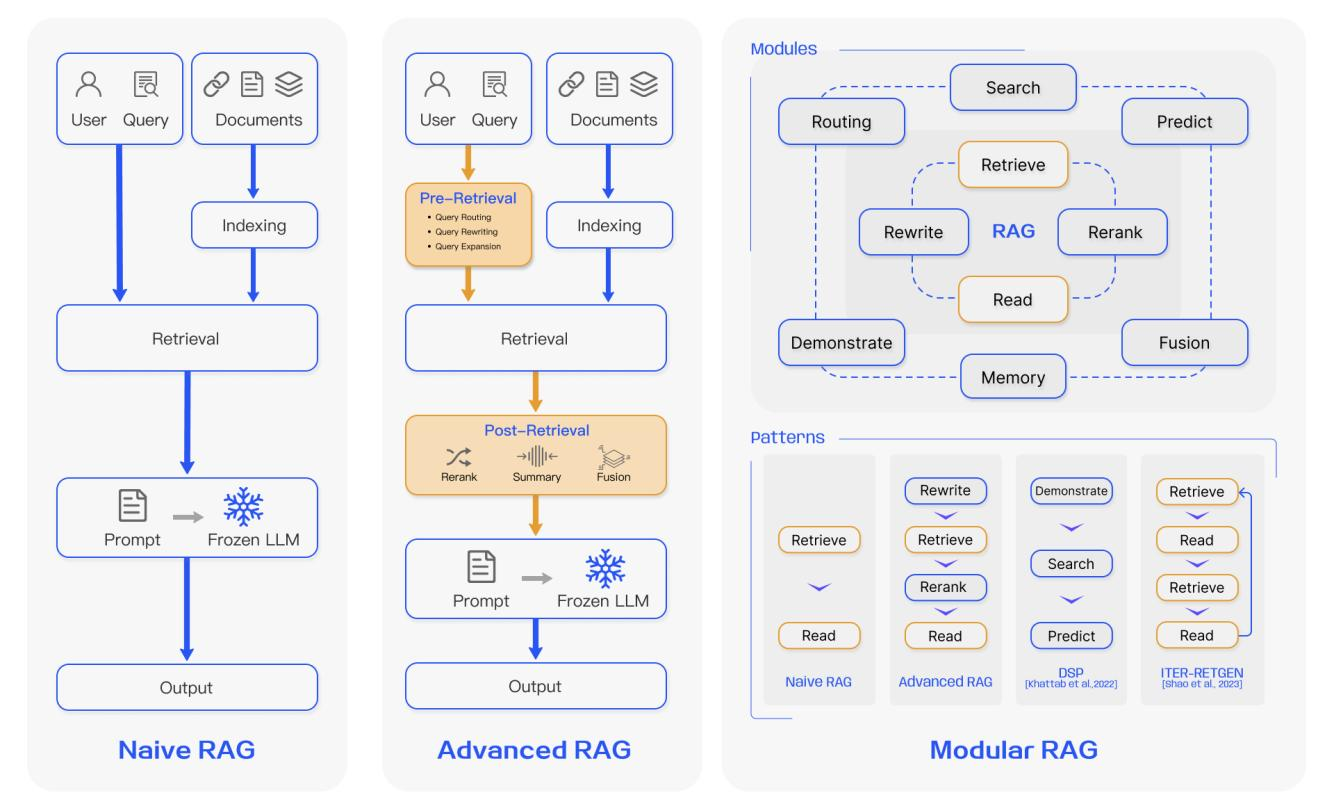

Index: 241,Caption:Fig. 4. RAG compared with other model optimization methods in the aspects of “External Knowledge Required” and “Model Adaption Required”. Prompt Engineering requires low modifications to the model and external knowledge, focusing on harnessing the capabilities of LLMs themselves. Fine-tuning, on the other hand, involves further training the model. In the early stages of RAG (Naive RAG), there is a low demand for model modifications. As research progresses, Modular RAG has become more integrated with fine-tuning techniques.


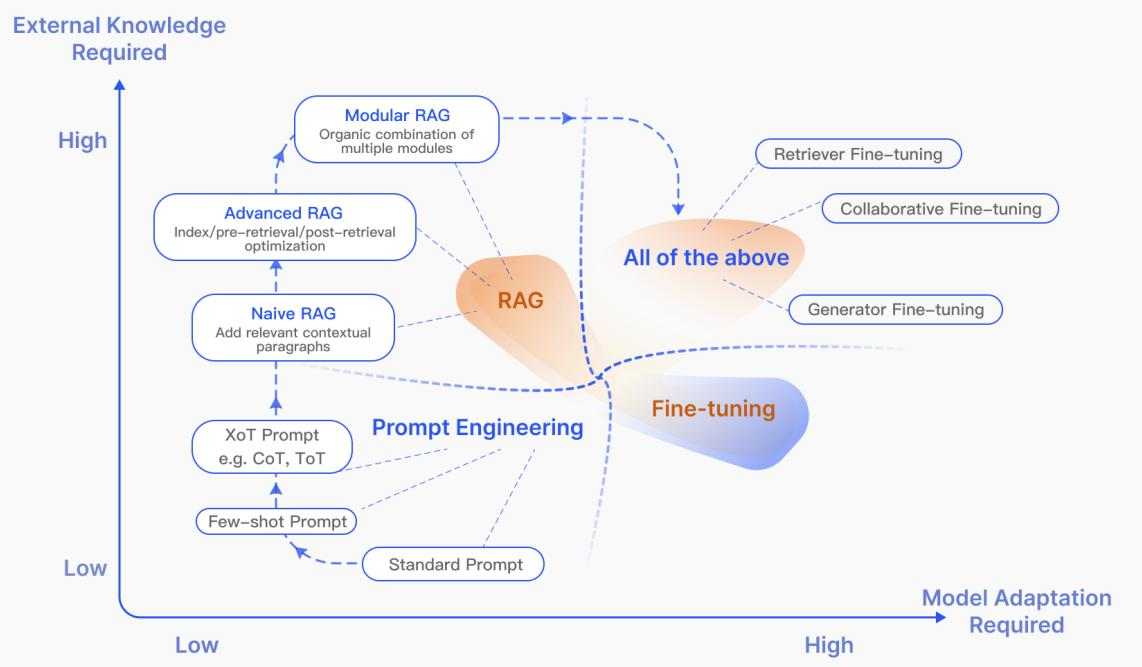

Index: 305,Caption:Fig. 5. In addition to the most common once retrieval, RAG also includes three types of retrieval augmentation processes. (left) Iterative retrieval involves alternating between retrieval and generation, allowing for richer and more targeted context from the knowledge base at each step. (Middle) Recursive retrieval involves gradually refining the user query and breaking down the problem into sub-problems, then continuously solving complex problems through retrieval and generation. (Right) Adaptive retrieval focuses on enabling the RAG system to autonomously determine whether external knowledge retrieval is necessary and when to stop retrieval and generation, often utilizing LLM-generated special tokens for control.


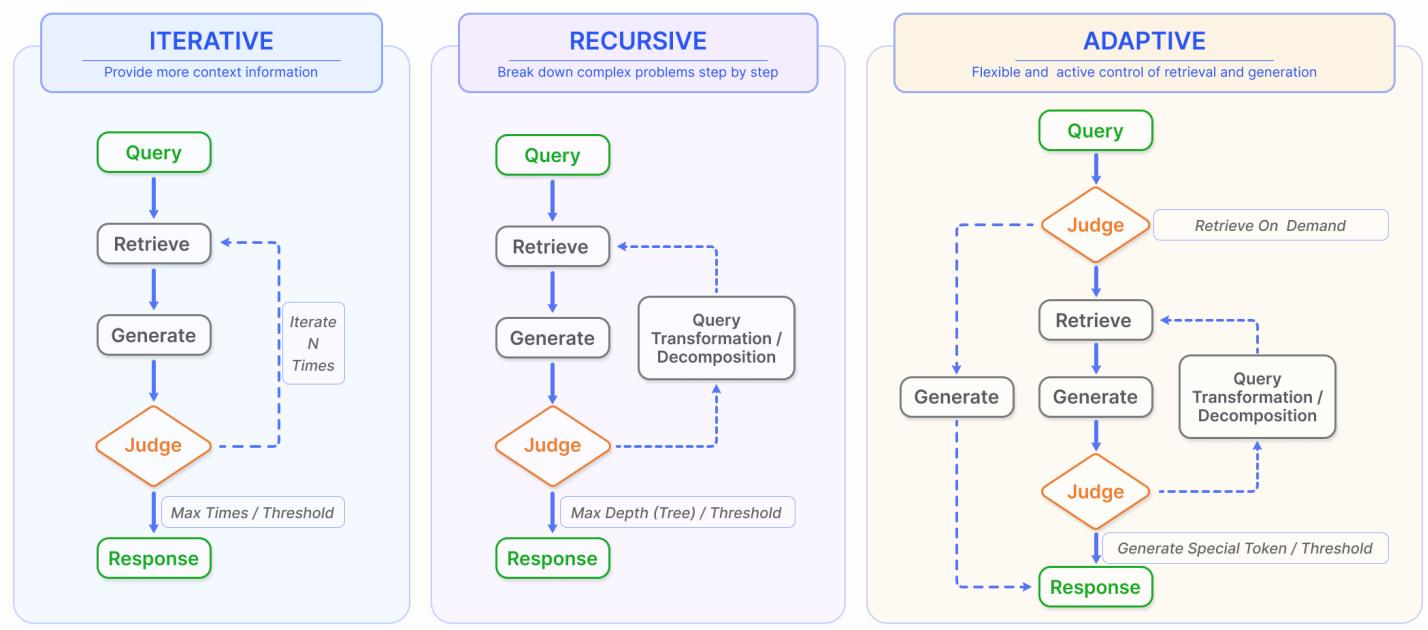

Index: 416,Caption:Fig. 6. Summary of RAG ecosystem


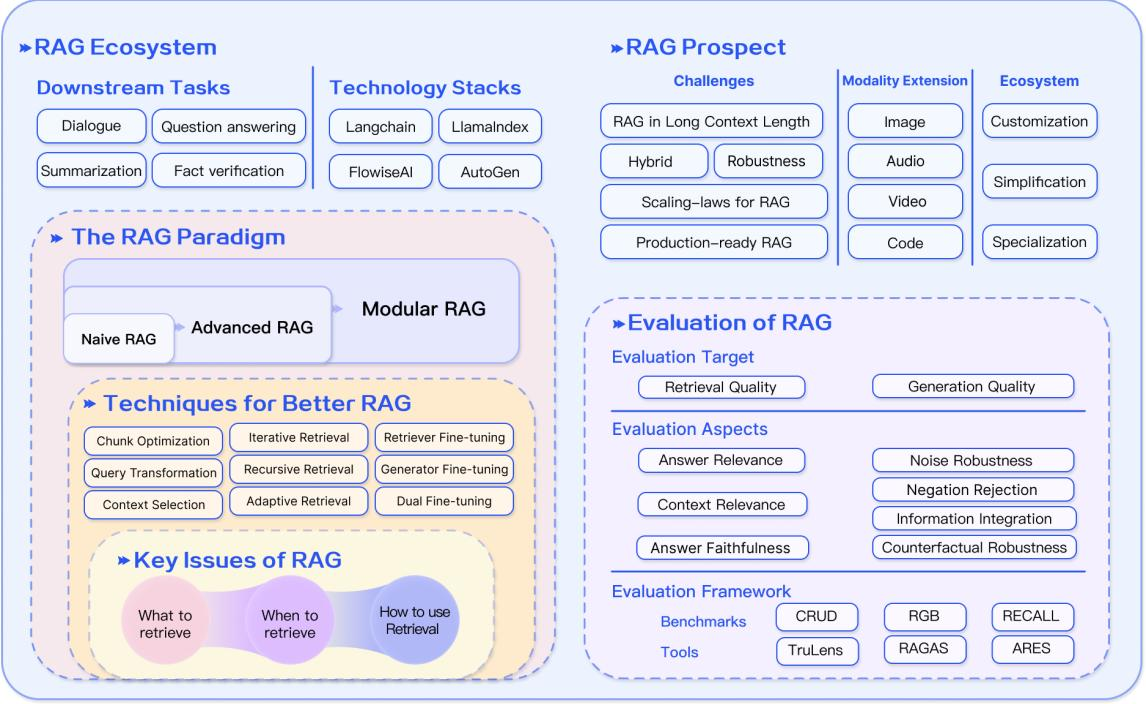

In [12]:
for image_data in all_images:
    print(f"Index: {image_data['index']},Caption:{image_data['caption']}")
    display_image(image_data["base64_image"])

### Image Captioning

In [13]:
from dotenv import load_dotenv
import os

load_dotenv()

api_key = os.getenv("GEMINI_API_KEY")
if not api_key:
    raise ValueError("GEMINI_API_KEY is not set in .env")

In [14]:

import google.generativeai as genai
genai.configure(api_key=api_key)


# Function to generate a detailed description of an image using Gemini AI
def generate_image_description(image_data):
    model = genai.GenerativeModel("gemini-1.5-flash") 

    image_binary = base64.b64decode(image_data["base64_image"])

    prompt = (
        f"Describe the image in detail. The caption is: {image_data['caption']}."
        f"The image text is: {image_data['image_text']}" 
        f"Directly analyze the image and provide a detailed description without any additional text."
    )

    response = model.generate_content([
        prompt,
        {"mime_type": "image/png", "data": image_binary},
    ])

    return response.text

C:\Users\saura\AppData\Local\Temp\ipykernel_17148\1603798248.py:1: FutureWarning: 

All support for the `google.generativeai` package has ended. It will no longer be receiving 
updates or bug fixes. Please switch to the `google.genai` package as soon as possible.
See README for more details:

https://github.com/google-gemini/deprecated-generative-ai-python/blob/main/README.md

  import google.generativeai as genai


In [15]:
generate_image_description(all_images[0])

InvalidArgument: 400 API key not valid. Please pass a valid API key. [reason: "API_KEY_INVALID"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
, locale: "en-US"
message: "API key not valid. Please pass a valid API key."
]

### Table Parsing

In [16]:

from unstructured.documents.elements import Table

# Extract tables from the raw chunks
table_data = []
for idx, element in enumerate(raw_chunks):
    if isinstance(element, Table):
        table_data.append({
            "table_as_html": element.metadata.text_as_html,
        })

In [17]:

# Print the first table data
print(table_data[0])  

{'table_as_html': '<table><thead><tr><th>\\</th><th>Retrieval Source</th><th>Retrieval Data Type</th><th>Retrieval Granularity</th><th>Augmentation Stage</th></tr></thead><tbody><tr><td>)]</td><td>Wikipedia</td><td>Text</td><td>Phrase</td><td>Pre-training</td></tr><tr><td>30</td><td>FactoidWiki</td><td>Text</td><td>Proposition</td><td>Inference</td></tr><tr><td>1]</td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td>20.</td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td>32</td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td>17]</td><td>Dataset-base</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td>24</td><td>Search Engine, Wikipedia</td><td>Text</td><td>Sentence</td><td>Tuning</td></tr><tr><td>33</td><td>Wikipedia</td><td>Text</td><td>Sentence</td><td>Inference</td></tr><tr><td>34</td><td>Wikipedia</td><td>Text</td><td>Sentence</td><td>Inference</td></tr><tr><td>35,</td><td>Dataset-

In [18]:
from IPython.display import display, HTML

# Display the first table's HTML representation
def display_table_as_html(table_html):
    display(HTML(table_html))

display_table_as_html(table_data[0]["table_as_html"]) 

\,Retrieval Source,Retrieval Data Type,Retrieval Granularity,Augmentation Stage
)],Wikipedia,Text,Phrase,Pre-training
30,FactoidWiki,Text,Proposition,Inference
1],Dataset-base,Text,Sentence,Tuning
20.,Dataset-base,Text,Sentence,Tuning
32,Dataset-base,Text,Sentence,Tuning
17],Dataset-base,Text,Sentence,Tuning
24,"Search Engine, Wikipedia",Text,Sentence,Tuning
33,Wikipedia,Text,Sentence,Inference
34,Wikipedia,Text,Sentence,Inference
"35,",Dataset-base,Text,Sentence,Inference


In [19]:

# Genereate table description using Gemini
def generate_table_description(table_html):
    model = genai.GenerativeModel("gemini-1.5-flash") 

    prompt = (
        "Analyze the following table and provide a detailed description of its contents, "
        "including the structure, key data points, and any notable trends or insights."
        f"Here is the table in HTML format: {table_html}"
        "Directly analyze the table and provide a detailed description without any additional text."
    )

    response = model.generate_content([prompt])
    return response.text

In [20]:
print(generate_table_description(table_data[1]["table_as_html"]))  # Example usage with the second table


InvalidArgument: 400 API key not valid. Please pass a valid API key. [reason: "API_KEY_INVALID"
domain: "googleapis.com"
metadata {
  key: "service"
  value: "generativelanguage.googleapis.com"
}
, locale: "en-US"
message: "API key not valid. Please pass a valid API key."
]

In [24]:
# Generate Table Summary using Ollama - Local Model Serving
import requests


def generate_table_summary(table_html):
    url = "http://localhost:11434/api/generate"
    data = {
        "model": "deepseek-r1:1.5b",
        "prompt": (
            "Analyze the following table and provide a detailed summary of its contents, "
            "including the structure, key data points, and any notable trends or insights."
            f"Here is the table in HTML format: {table_html}"
            "Directly analyze the table and provide a detailed summary without any additional text."
        ),
        "max_tokens": 1000,
        "stream": False,
        "temperature": 0.7,
    }

    response = requests.post(url, json=data)
    response.raise_for_status()
    return response.json().get("response", "No response from model")


In [25]:
print(generate_table_summary(table_data[1]["table_as_html"]))  # Example usage with the second table


The table appears to be a structured summary of various task-oriented dialogue systems and their associated methods. Here is a detailed analysis:

**Structure:**
- **Headers:** 'Sub Task', 'Dataset', 'Method'
- **Rows:**
  - Contains multiple subtasks under each method across different datasets.

**Key Data Points:**

1. **SQuAD Dominance:**
   - The SQuAD (Session-Specific Accessible Description) section seems to have the highest number of entries, likely indicating SQuAD is a dominant method across various subtasks and datasets.
   - Entries like 22), [25], [43], etc., suggest multiple tasks under SQuAD with different methods.

2. **Missing Datasets:**
   - The text within parentheses (e.g., 122, 71, 91) indicates that some entries may be incomplete or placeholders, possibly indicating areas needing more information.

3. **Common Patterns in Methods:**
   - 'Multi-choice QA' and 'Task-Oriented Dialog Recommendation' are recurring methods across multiple subtasks.
   - 'Arc' (ACAI) ap

### Text Parsing - Semantic Chunking using title

In [26]:

text_chunks = partition_pdf(
    filename=pdf_file_path,
    strategy="hi_res",
    chunking_strategy="by_title",
    max_characters=2000,
    combine_text_under_n_chars=500,
    new_after_n_chars=1500
)

text_chunks[:30]  # Display the first 30 text chunks

In [ ]:
from unstructured.documents.elements import CompositeElement

for idx, chunk in enumerate(text_chunks):
    if isinstance(chunk, CompositeElement):
        print(f"Chunk {idx}: {chunk.text[:50]}...")  # Print first 50 characters of each chunk